<a href="https://colab.research.google.com/github/yzc1122333/Comp-9418-ass2-A-library-of-Probabilistic-Graphical-Models/blob/master/w_o_residual_structure_of_BAA_final_MRSAnet_34__4_728__Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!curl https://raw.githubusercontent.com/pytorch/xla/master/contrib/scripts/env-setup.py -o pytorch-xla-env-setup.py
!python pytorch-xla-env-setup.py --version 20201010 --apt-packages libomp5 libopenblas-dev

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5116  100  5116    0     0  29744      0 --:--:-- --:--:-- --:--:-- 29744
Updating... This may take around 2 minutes.
Updating TPU runtime to pytorch-dev20201010 ...
     |████████████████████████████████| 61kB 2.2MB/s 
Uninstalling torch-1.7.0+cu101:
  Found existing installation: google-api-python-client 1.7.12
    Uninstalling google-api-python-client-1.7.12:
      Successfully uninstalled google-api-python-client-1.7.12
Done updating TPU runtime
  Successfully uninstalled torch-1.7.0+cu101
Uninstalling torchvision-0.8.1+cu101:
  Successfully uninstalled torchvision-0.8.1+cu101
Copying gs://tpu-pytorch/wheels/torch-nightly+20201010-cp36-cp36m-linux_x86_64.whl...
- [1 files][114.8 MiB/114.8 MiB]                                                
Operation completed over 1 objects/114.8 MiB.                                    


In [3]:
!pip install pretrainedmodels

     |████████████████████████████████| 61kB 2.2MB/s 
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-cp36-none-any.whl size=60964 sha256=e64f1efb957b31a188e84f7481a9f8c0bd06f3a01c1de7b83abe8a24759f7782
  Stored in directory: /root/.cache/pip/wheels/69/df/63/62583c096289713f22db605aa2334de5b591d59861a02c2ecd
Successfully built pretrainedmodels


In [4]:
!pip install albumentations==0.4.5

     |████████████████████████████████| 122kB 3.4MB/s 
     |████████████████████████████████| 634kB 8.4MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=64378 sha256=8c8e8f40897bd88cbb07e871d650978cf57af050784f84990690d468371c802e
  Stored in directory: /root/.cache/pip/wheels/f0/a0/61/e50f93165a5ec7e7f5d65064e513239505bc4c06d2289557d3
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654021 sha256=80da34c441deec4d57ccc72f372d4e3b10093bcddf836ac8b326aca411be1c12
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [5]:
!cat /proc/cpuinfo | grep 'physical id' | sort | uniq | wc -l
!cat /proc/cpuinfo |grep "cores"|uniq|awk '{print $4}'
!grep 'processor' /proc/cpuinfo | sort -u | wc -l

1
20
40


In [6]:
import numpy as np 
import pandas as pd 
import os, sys, random
import numpy as np
import pandas as pd
import cv2
import shutil

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from torch import Tensor

from torch.utils.data import Dataset, DataLoader
from torch.utils.data.dataloader import _utils

from random import choice

from skimage import io
from PIL import Image, ImageOps

import glob

#from torchsummary import summary
import logging

import matplotlib.pyplot as plt

import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision.models as models
# from tqdm.notebook import tqdm
from tqdm import tqdm
from sklearn.utils import shuffle
# from apex import amp

import random

import time

from torch.optim.lr_scheduler import StepLR
from torch.nn.parameter import Parameter

from albumentations.augmentations.transforms import Lambda, ShiftScaleRotate, HorizontalFlip, Normalize, RandomBrightnessContrast, RandomResizedCrop
from albumentations.pytorch import ToTensor
from albumentations import Compose, OneOrOther

In [7]:
import albumentations
albumentations.__version__

'0.4.5'

In [8]:
import warnings
import torch_xla
import torch_xla.debug.metrics as met
import torch_xla.distributed.data_parallel as dp
import torch_xla.distributed.parallel_loader as pl
import torch_xla.utils.utils as xu
import torch_xla.core.xla_model as xm
import torch_xla.distributed.xla_multiprocessing as xmp
import torch_xla.test.test_utils as test_utils
import warnings

warnings.filterwarnings("ignore")

In [9]:
def seed_everything(seed=1234):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    # torch.cuda.manual_seed(seed)
    # torch.backends.cudnn.deterministic = True

In [10]:
train_df = pd.read_csv(f'/content/drive/My Drive/BAA/train.csv')

In [11]:
len(train_df)

12611

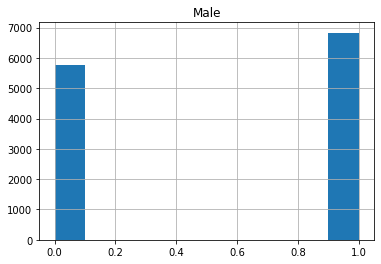

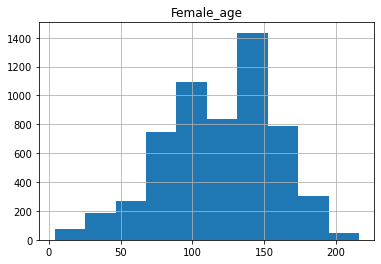

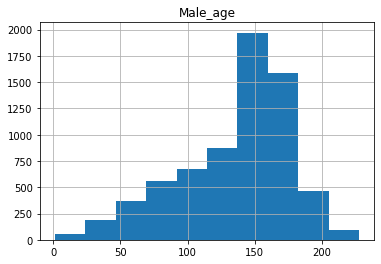

In [12]:
plt.title('Male')
train_df['male'].astype(int).hist()
plt.show()
plt.title('Female_age')
train_df[train_df['male']==False]['boneage'].hist()
plt.show()
plt.title('Male_age')
train_df[train_df['male']==True]['boneage'].hist()
plt.show()

In [13]:
val_df = pd.read_csv(f'/content/drive/My Drive/BAA/Validation Dataset.csv')

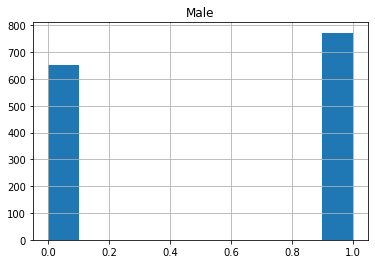

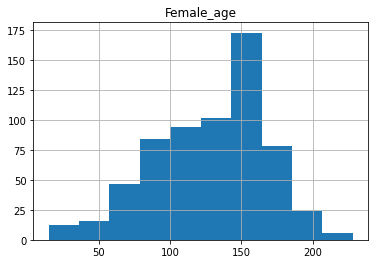

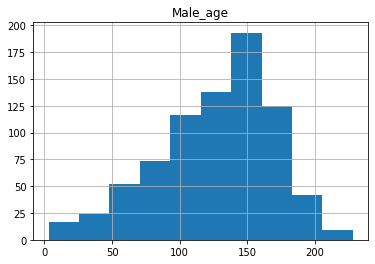

In [14]:
plt.title('Male')
val_df['male'].astype(int).hist()
plt.show()
plt.title('Female_age')
val_df[train_df['male']==False]['boneage'].hist()
plt.show()
plt.title('Male_age')
val_df[train_df['male']==True]['boneage'].hist()
plt.show()

In [15]:
boneage_mean = train_df['boneage'].mean()
boneage_div = train_df['boneage'].std()

In [16]:
train_df

,id,boneage,male
0,1377,180,False
1,1378,12,False
2,1379,94,False
3,1380,120,True
4,1381,82,False
...,...,...,...
12606,15605,50,False
12607,15606,113,False
12608,15608,55,False
12609,15609,150,True


In [17]:
val_df

,id,male,boneage
0,1386,False,30
1,1392,True,162
2,1397,False,18
3,1401,False,132
4,1410,True,57
...,...,...,...
1420,15592,False,42
1421,15601,False,132
1422,15607,True,186
1423,15611,False,120


In [18]:
test_df = pd.read_excel('/content/drive/My Drive/BAA/Bone age ground truth.xlsx')

### Create data set

In [19]:
# norm_mean = [0.485, 0.456, 0.406]
# norm_std = [0.229, 0.224, 0.225]
# #R*0.299 + G*0.587 + B*0.114
# a = np.array([0.299, 0.587, 0.114])
# a.dot(np.array(norm_mean))
# a.dot(np.array(norm_std))

In [20]:
norm_mean = [0.143] #0.458971
norm_std = [0.144] #0.225609

# norm_mean = [0.143, 0.143, 0.143] 
# norm_std = [0.144, 0.144, 0.144] 

RandomErasing = transforms.RandomErasing(scale=(0.02, 0.08), ratio = (0.5, 2), p = 0.8)

def randomErase(image, **kwargs):
    return RandomErasing(image)

def sample_normalize(image, **kwargs):
    image = image/255
    channel = image.shape[2]
    mean, std = image.reshape((-1, channel)).mean(axis = 0), image.reshape((-1, channel)).std(axis = 0)
    return (image-mean)/(std + 1e-3)


# rotation range of 20 degrees, horizontal/vertical translation up to 20%, zoom up to 20% and a horizontal flip
# transform_train = Compose([
#     ShiftScaleRotate(shift_limit = 0.2, scale_limit = 0.2, rotate_limit=20, p = 0.8),
#     HorizontalFlip(p = 0.5),
#     RandomBrightnessContrast(p = 0.8), 
#     Normalize(mean=norm_mean, std = norm_std, p = 1),                                    
#     ToTensor(),
#     Lambda(image = randomErase) 
    
# ])

# transform_val = Compose([                                   
#     Normalize(mean=norm_mean, std = norm_std, p = 1),
#     ToTensor(),
# ])

transform_train = Compose([
    # RandomBrightnessContrast(p = 0.8),
    RandomResizedCrop(512, 512, (0.5, 1.0), p = 0.5),
    ShiftScaleRotate(shift_limit = 0.2, scale_limit = 0.2, rotate_limit=20, border_mode = cv2.BORDER_CONSTANT, value = 0.0, p = 0.8),
    # HorizontalFlip(p = 0.5),
    
    # ShiftScaleRotate(shift_limit = 0.2, scale_limit = 0.2, rotate_limit=20, p = 0.8),
    HorizontalFlip(p = 0.5),
    RandomBrightnessContrast(p = 0.8),                             
    Lambda(image = sample_normalize),
    ToTensor(),
    Lambda(image = randomErase) 
    
])

transform_val = Compose([                                   
    Lambda(image = sample_normalize),
    ToTensor(),
])

transform_test = Compose([                                   
    Lambda(image = sample_normalize),
    ToTensor(),
])

In [21]:
# from torchvision.transforms import Normalize

# class Unnormalize:
#     """Converts an image tensor that was previously Normalize'd
#     back to an image with pixels in the range [0, 1]."""
#     def __init__(self, mean, std):
#         self.mean = mean
#         self.std = std

#     def __call__(self, tensor):
#         mean = torch.as_tensor(self.mean, dtype=tensor.dtype, device=tensor.device)
#         std = torch.as_tensor(self.std, dtype=tensor.dtype, device=tensor.device)
#         return torch.clamp(tensor*std + mean, 0., 1.)

# unnormalize_transform = Unnormalize(norm_mean, norm_std)

In [22]:
# def read_image(path, image_size = 512):
#     img = Image.open(path)
#     w, h = img.size
#     long = max(w, h)
#     w, h = int(w/long*image_size), int(h/long*image_size)
#     img = img.resize((w, h), Image.ANTIALIAS)
#     delta_w, delta_h = image_size - w, image_size - h
#     padding = (delta_w//2, delta_h//2, delta_w-(delta_w//2), delta_h-(delta_h//2))
#     return np.expand_dims(np.array(ImageOps.expand(img, padding)), axis=2)

def read_image(path, image_size = 512):
    img = Image.open(path)
    w, h = img.size
    long = max(w, h)
    w, h = int(w/long*image_size), int(h/long*image_size)
    img = img.resize((w, h), Image.ANTIALIAS)
    delta_w, delta_h = image_size - w, image_size - h
    padding = (delta_w//2, delta_h//2, delta_w-(delta_w//2), delta_h-(delta_h//2))
    return np.array(ImageOps.expand(img, padding).convert("RGB"))

In [23]:
class BAATrainDataset(Dataset):
    def __init__(self, df, file_path):
        def preprocess_df(df):
            #nomalize boneage distribution
            df['zscore'] = df['boneage'].map(lambda x: (x - boneage_mean)/boneage_div )
            #change the type of gender, change bool variable to float32
            df['male'] = df['male'].astype('float32')
            df['bonage'] = df['boneage'].astype('float32')
            return df

        self.df = preprocess_df(df)
        self.file_path = file_path
        
    def __getitem__(self, index):
        row = self.df.iloc[index]
        num = int(row['id'])
        return (transform_train(image = read_image(f"{self.file_path}/{num//1000}/{num}.png"))['image'], Tensor([row['male']])), row['zscore']
    
    def __len__(self):
        return len(self.df)
class BAAValDataset(Dataset):
    def __init__(self, df, file_path):
        def preprocess_df(df):
            #change the type of gender, change bool variable to float32
            df['male'] = df['male'].astype('float32')
            df['bonage'] = df['boneage'].astype('float32')
            return df
        self.df = preprocess_df(df)
        self.file_path = file_path
        
    def __getitem__(self, index):
        row = self.df.iloc[index]
        return (transform_val(image = read_image(f"{self.file_path}/{int(row['id'])}.png"))['image'], Tensor([row['male']])), row['boneage']
    
    def __len__(self):
        return len(self.df)
        
class BAATestDataset(Dataset):
    def __init__(self, df, file_path):
        def preprocess_df(df):
            #change the type of gender, change bool variable to float32
            df['male'] = (df['Sex'] == 'M').astype('float32')
            df['boneage'] = df['Ground truth bone age (months)'].astype('float32')
            df['id'] = df['Case ID'].astype('int32')
            return df
        self.df = preprocess_df(df)
        print(self.df.head())
        self.file_path = file_path
        
    def __getitem__(self, index):
        row = self.df.iloc[index]
        return (transform_test(image = read_image(f"{self.file_path}/{int(row['id'])}.png"))['image'], Tensor([row['male']])), row['boneage']
    
    def __len__(self):
        return len(self.df) 

def create_data_loader(train_df, val_df, test_df, train_root, val_root, test_root):
    return BAATrainDataset(train_df, train_root), BAAValDataset(val_df, val_root), BAATestDataset(test_df, test_root)

In [24]:
!ls '/content/drive/My Drive/BAA/boneage-training-dataset/1377.png'

ls: cannot access '/content/drive/My Drive/BAA/boneage-training-dataset/1377.png': No such file or directory


In [25]:
train_set, val_set, test_set = create_data_loader(train_df, val_df, test_df, '/content/drive/My Drive/BAA/boneage-training-dataset', '/content/drive/My Drive/BAA/boneage-validation-dataset', '/content/drive/My Drive/BAA/Test Set Images')

   Case ID Sex  Ground truth bone age (months)  male     boneage    id
0     4360   M                      168.934249   1.0  168.934250  4360
1     4361   M                      169.652678   1.0  169.652679  4361
2     4362   M                       73.256112   1.0   73.256111  4362
3     4363   M                      152.862669   1.0  152.862671  4363
4     4364   M                      135.456954   1.0  135.456955  4364


In [26]:
# def create_data_loader(train_df, val_df, train_root, val_root, batch_size = 32, num_numbers = 4):
#     train_set = DataLoader(BAATrainDataset(train_df, train_root), \
#                         batch_size = batch_size, pin_memory=True, num_workers = num_numbers)
#     val_set = DataLoader(BAAValDataset(val_df, val_root),\
#                         batch_size = 2*batch_size, pin_memory=True, num_workers = num_numbers)
#     return train_set, val_set

# class Unnormalize:
#     """Converts an image tensor that was previously Normalize'd
#     back to an image with pixels in the range [0, 1]."""
#     def __init__(self, mean, std):
#         self.mean = mean
#         self.std = std

#     def __call__(self, tensor):
#         mean = torch.as_tensor(self.mean, dtype=tensor.dtype, device=tensor.device)
#         std = torch.as_tensor(self.std, dtype=tensor.dtype, device=tensor.device)
#         return torch.clamp(tensor*std + mean, 0., 1.)

# unnormalize_transform = Unnormalize(norm_mean, norm_std)

# train_loader, val_loader = create_data_loader(train_df, val_df, '/content/drive/My Drive/BAA/boneage-training-dataset', '/content/drive/My Drive/BAA/boneage-validation-dataset')
# t_x, t_y = next(iter(train_loader))
# fig, m_axs = plt.subplots(4, 4, figsize = (16, 8))

# for (c_x0, c_x1, c_y, c_ax) in zip(*t_x, t_y, m_axs.flatten()):
#     print(c_x0[0].shape)
#     c_ax.imshow(unnormalize_transform(c_x0)[0], cmap = 'gray')
#     c_ax.set_title(f'{(c_y*boneage_div+boneage_mean):2.0f} months, {"male" if c_x1 else "female"}')
#     c_ax.axis('off')

### Define model

In [27]:
from pretrainedmodels import se_resnext101_32x4d, se_resnet152, xception, inceptionv4, inceptionresnetv2
from torchvision.models import resnet18, resnet34, resnet50

def get_My_resnet18():
    model = resnet18(pretrained = True)
    output_channels = model.fc.in_features
    model = list(model.children())[:-2]
    return model, output_channels

def get_My_resnet34():
    model = resnet34(pretrained = True)
    output_channels = model.fc.in_features
    model = list(model.children())[:-2]
    return model, output_channels

def get_My_resnet50():
    model = resnet50(pretrained = True)
    output_channels = model.fc.in_features
    model = list(model.children())[:-2]
    return model, output_channels

def get_My_se_resnet152():
    model = se_resnet152(pretrained = None)
    output_channels = model.last_linear.in_features
    model = nn.Sequential(*list(model.children())[:-2])
    return model, output_channels

def get_My_se_resnext101_32x4d():
    model = se_resnext101_32x4d()
    output_channels = model.last_linear.in_features
    model = nn.Sequential(*list(model.children())[:-2])
    return model, output_channels

def get_My_inceptionv4():
    model = inceptionv4()
    output_channels = model.last_linear.in_features
    model = list(model.children())[:-2]
    
    model = nn.Sequential(*model)
    return model, output_channels

def get_My_inceptionresnetv2():
    model = inceptionresnetv2()
    output_channels = model.last_linear.in_features
    model = list(model.children())[:-2]
    
    model = nn.Sequential(*model)
    return model, output_channels

# get_My_se_resnet152()
a, b = get_My_resnet34()
a

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


[Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False),
 BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 ReLU(inplace=True),
 MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False),
 Sequential(
   (0): BasicBlock(
     (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace=True)
     (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   )
   (1): BasicBlock(
     (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace=True)
     (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), pad

In [28]:
# from collections import OrderedDict
# layer0_modules = [
#   ('conv1', nn.Conv2d(1, 64, kernel_size=7, stride=2,
#                       padding=3, bias=False)),
#   ('bn1', nn.BatchNorm2d(64)),
#   ('relu1', nn.ReLU(inplace=True)),
# ]
# layer0_modules.append(('pool', nn.MaxPool2d(3, stride=2, ceil_mode=True)))
# layer0_modules = nn.Sequential(OrderedDict(layer0_modules))

# from pretrainedmodels import se_resnext101_32x4d, se_resnet152, xception, inceptionv4

# def get_My_se_resnet152():
#     model = se_resnet152()
#     output_channels = model.last_linear.in_features
#     model = list(model.children())[:-2]
#     model[0] = layer0_modules
    
#     model = nn.Sequential(*model)
#     return model, output_channels

# def get_My_xception():
#     model = xception()
#     output_channels = model.last_linear.in_features
#     model = list(model.children())[:-2]
#     model[0] = nn.Conv2d(1, 32, 3,2, 0, bias=False)
    
#     model = nn.Sequential(*model)
#     return model, output_channels

# class BasicConv2d(nn.Module):

#     def __init__(self, in_planes, out_planes, kernel_size, stride, padding=0):
#         super(BasicConv2d, self).__init__()
#         self.conv = nn.Conv2d(in_planes, out_planes,
#                               kernel_size=kernel_size, stride=stride,
#                               padding=padding, bias=False) # verify bias false
#         self.bn = nn.BatchNorm2d(out_planes,
#                                  eps=0.001, # value found in tensorflow
#                                  momentum=0.1, # default pytorch value
#                                  affine=True)
#         self.relu = nn.ReLU(inplace=True)

#     def forward(self, x):
#         x = self.conv(x)
#         x = self.bn(x)
#         x = self.relu(x)
#         return x



In [29]:
4//2**2

1

In [30]:
class Pooling_attention(nn.Module):
  def __init__(self, input_channels, kernel_size = 1):
    super(Pooling_attention, self).__init__()
    self.pooling_attention = nn.Sequential(
        nn.Conv2d(input_channels, 1, kernel_size = kernel_size, padding = kernel_size//2),
        nn.ReLU()
    )
  def forward(self, x):
    return self.pooling_attention(x) 


# class Part_Relation(nn.Module):
#   def __init__(self, input_channels, reduction = 16):
#     super(Part_Relation, self).__init__()
#     self.pooling_attention_0 = nn.Sequential(
#       nn.Conv2d(input_channels, input_channels//reduction, kernel_size = 1),
#       nn.BatchNorm2d(input_channels//reduction),
#       nn.ReLU()
#     )
#     self.pooling_attention_1 = Pooling_attention(input_channels//reduction, 1)
#     self.pooling_attention_3 = Pooling_attention(input_channels//reduction, 3)
#     self.pooling_attention_5 = Pooling_attention(input_channels//reduction, 5)

#     self.last_conv =  nn.Sequential(
#         nn.Conv2d(3, 1, kernel_size = 1),
#         nn.Sigmoid()
#     )


    # self.se = SEModule(input_channels, 16)
#   def forward(self, x):
#     input = x
#     x = self.pooling_attention_0(x)
#     x = torch.cat([self.pooling_attention_1(x), self.pooling_attention_3(x), self.pooling_attention_5(x)], dim = 1)
#     x = self.last_conv(x)
#     return input + input*x

class Part_Relation(nn.Module):
  def __init__(self, input_channels, reduction = [16], level = 1):
    super(Part_Relation, self).__init__()
    
    modules = []
    for i in range(level):
        output_channels = input_channels//reduction[i]
        modules.append(nn.Conv2d(input_channels, output_channels, kernel_size = 1))
        modules.append(nn.BatchNorm2d(output_channels))
        modules.append(nn.ReLU())
        input_channels = output_channels

    self.pooling_attention_0 = nn.Sequential(*modules)
    self.pooling_attention_1 = Pooling_attention(input_channels, 1)
    self.pooling_attention_3 = Pooling_attention(input_channels, 3)
    self.pooling_attention_5 = Pooling_attention(input_channels, 5)

    self.last_conv =  nn.Sequential(
        nn.Conv2d(3, 1, kernel_size = 1),
        nn.Sigmoid()
    )
  def forward(self, x):
    input = x
    x = self.pooling_attention_0(x)
    x = torch.cat([self.pooling_attention_1(x), self.pooling_attention_3(x), self.pooling_attention_5(x)], dim = 1)
    x = self.last_conv(x)
    return input*x

In [31]:
class BAA_New(nn.Module):
    def __init__(self, gender_encode_length, backbone, out_channels):
        super(BAA_New, self).__init__()
        self.backbone0 = nn.Sequential(*backbone[0:5])
        self.out_channels = out_channels
        self.backbone1 = backbone[5]
        self.backbone2 = backbone[6]
        self.backbone3 = backbone[7]

        self.part_relation0 = Part_Relation(64)
        self.part_relation1 = Part_Relation(128)
        self.part_relation2 = Part_Relation(256)
        self.part_relation3 = Part_Relation(512)

        self.gender_encoder = nn.Linear(1, gender_encode_length)
        self.gender_bn = nn.BatchNorm1d(gender_encode_length)

        self.fc0 = nn.Linear(out_channels + gender_encode_length, 512)
        self.bn0 = nn.BatchNorm1d(512)

        self.fc1 = nn.Linear(512, 256)
        self.bn1 = nn.BatchNorm1d(256)

        self.output = nn.Linear(256, 1)

    def forward(self, image, gender):
        x = self.part_relation0(self.backbone0(image))
        # x  = self.backbone0(image)
        x = self.part_relation1(self.backbone1(x))
        # x = self.backbone1(x)
        x = self.part_relation2(self.backbone2(x))
        # x = self.backbone2(x)
        x = self.part_relation3(self.backbone3(x))
        # x = self.backbone3(x)

        x = F.adaptive_avg_pool2d(x, 1)
        x = torch.squeeze(x)
        x.view(-1, self.out_channels)

        gender_encode = self.gender_bn(self.gender_encoder(gender))
        gender_encode = F.relu(gender_encode)

        x = torch.cat([x,  gender_encode], dim = 1)

        x = F.relu(self.bn0(self.fc0(x)))

        x = F.relu(self.bn1(self.fc1(x)))

        return self.output(x)

In [32]:
# class Part_Relation(nn.Module):
#   def __init__(self, input_channels, kernel_size = 1):
#     super(Part_Relation, self).__init__()
#     self.pooling_attention = nn.Sequential(
#       nn.Conv2d(input_channels, 1, kernel_size = kernel_size, padding = kernel_size//2),
#       nn.Sigmoid()
#     )
#   def forward(self, x):
#     return x + x*self.pooling_attention(x)


# class BAA_New(nn.Module):
#     def __init__(self, gender_encode_length, backbone, out_channels):
#         super(BAA_New, self).__init__()
#         self.backbone0 = nn.Sequential(*backbone[0:5])
#         self.out_channels = out_channels
#         self.backbone1 = backbone[5]
#         self.backbone2 = backbone[6]
#         self.backbone3 = backbone[7]

#         self.part_relation0 = Part_Relation(64, 1)
#         self.part_relation1 = Part_Relation(128,1)
#         self.part_relation2 = Part_Relation(256, 1)
#         self.part_relation3 = Part_Relation(512)

#         self.gender_encoder = nn.Linear(1, gender_encode_length)
#         self.gender_bn = nn.BatchNorm1d(gender_encode_length)

#         self.fc0 = nn.Linear(out_channels + gender_encode_length, 512)
#         self.bn0 = nn.BatchNorm1d(512)

#         self.fc1 = nn.Linear(512, 256)
#         self.bn1 = nn.BatchNorm1d(256)

#         self.output = nn.Linear(256, 1)

#     def forward(self, image, gender):
#         x = self.backbone0(image)
#         # x  = self.backbone0(image)
#         x = self.backbone1(x)
#         # x = self.backbone1(x)
#         x = self.backbone2(x)
#         x = self.part_relation3(self.backbone3(x))

#         x = F.adaptive_avg_pool2d(x, 1)
#         x = torch.squeeze(x)
#         x.view(-1, self.out_channels)

#         gender_encode = self.gender_bn(self.gender_encoder(gender))
#         gender_encode = F.relu(gender_encode)

#         x = torch.cat([x,  gender_encode], dim = 1)

#         x = F.relu(self.bn0(self.fc0(x)))

#         x = F.relu(self.bn1(self.fc1(x)))

        # return self.output(x)

In [33]:
# class BAA_base1(nn.Module):
#     def __init__(self, gender_encode_length, backbone, out_channels):
#         super(BAA_base1, self).__init__()
#         self.backbone = backbone
        
#         self.gender_encoder = nn.Linear(1, gender_encode_length)
#         self.gender_bn = nn.BatchNorm1d(gender_encode_length)

#         self.fc0 = nn.Linear(out_channels + gender_encode_length, 512)
#         self.bn0 = nn.BatchNorm1d(512)

#         self.dropout = nn.Dropout(p = 0.2)

#         self.fc1 = nn.Linear(512, 256)
#         self.bn1 = nn.BatchNorm1d(256)

#         self.fc2 = nn.Linear(256, 128)
#         self.bn2 = nn.BatchNorm1d(128)

#         self.output = nn.Linear(128, 1)

#     def forward(self, image, gender):
#         image_encode = F.adaptive_avg_pool2d(self.backbone(image), 1)
#         image_encode = torch.squeeze(image_encode)

#         gender_encode = self.gender_bn(self.gender_encoder(gender))
#         gender_encode = F.relu(gender_encode)

#         x = torch.cat([image_encode,  gender_encode], dim = 1)

#         x = F.relu(self.bn0(self.fc0(x)))

#         x = F.relu(self.bn1(self.fc1(x)))

#         x = F.relu(self.bn2(self.fc2(x)))

#         # x = self.dropout(x)

#         return self.output(x)


In [34]:
# model = BAA_base1(32, *get_My_se_resnet152())
# model.load_state_dict(torch.load('/content/drive/My Drive/trained_net/senet152_fc_512_256_128/best_senet152_fc_512_256_128.bin'))
# model = list(model.children())[0]

In [35]:
# class BAA_base(nn.Module):
#     def __init__(self, gender_encode_length):
#         super(BAA_base, self).__init__()
#         self.backbone, out_channels = model, 2048
#         self.conv_pooling = nn.Conv1d(2048, 1024, kernel_size = 2)
        
#         self.gender_encoder = nn.Linear(1, gender_encode_length)
#         self.gender_bn = nn.BatchNorm1d(gender_encode_length)

#         self.fc0 = nn.Linear(1024 + gender_encode_length, 512)
#         self.bn0 = nn.BatchNorm1d(512)

#         self.dropout = nn.Dropout(p = 0.2)

#         self.fc1 = nn.Linear(512, 256)
#         self.bn1 = nn.BatchNorm1d(256)

#         self.fc2 = nn.Linear(256, 128)
#         self.bn2 = nn.BatchNorm1d(128)

#         self.output = nn.Linear(128, 1)

#     def forward(self, image, gender):
#         image_encode = self.backbone(image)
        
#         image_encode = torch.squeeze(image_encode)
#         image_encode = self.conv_pooling(image_encode)
#         image_encode = torch.squeeze(image_encode)

#         gender_encode = self.gender_bn(self.gender_encoder(gender))
#         gender_encode = F.relu(gender_encode)

#         x = torch.cat([image_encode,  gender_encode], dim = 1)

#         x = F.relu(self.bn0(self.fc0(x)))

#         x = F.relu(self.bn1(self.fc1(x)))

#         x = F.relu(self.bn2(self.fc2(x)))

#         # x = self.dropout(x)

#         return self.output(x)
# BAA_base(32)

In [36]:
# model = BAA_base(32)
# model.load_state_dict(torch.load('/content/drive/My Drive/trained_net/senet152_fc_512_256_128/best_senet152_fc_512_256_128.bin'))
# model = list(model.children())[0]
# model[4]

In [37]:
# from copy import deepcopy
# class BAA_New(nn.Module):
#   def __init__(self, model):
#     super(BAA_New, self).__init__()

#     self.encoder = nn.Sequential(*model[:-1])

#     self.male = deepcopy(model[-1])
#     self.female = deepcopy(model[-1])

#     self.fc0 = nn.Linear(2048, 1024)
#     self.bn0 = nn.BatchNorm1d(1024)

#     # self.fc1 = nn.Linear(1024, 1024)
#     # self.bn1 = nn.BatchNorm1d(1024)

#     self.output = nn.Linear(1024, 1)

#   def forward(self, image, gender):
#     x = self.encoder(image)
#     gender = gender.view(-1 ,1, 1, 1)
#     x = self.female(x)*gender + self.male(x)*(1 - gender)
#     x = F.adaptive_avg_pool2d(x, 1)
#     x = torch.squeeze(x)
#     x = F.relu(self.bn0(self.fc0(x)))
#     # x = F.relu(self.bn1(self.fc1(x)))
#     return self.output(x)


# BAA_New(model)

In [38]:
# from copy import deepcopy
# class BAA_New(nn.Module):
#   def __init__(self, model):
#     super(BAA_New, self).__init__()

#     self.encoder = nn.Sequential(*model)


#     self.fc0 = nn.Linear(2048, 1024)
#     self.bn0 = nn.BatchNorm1d(1024)

#     self.fc1 = nn.Linear(1024, 1024)
#     self.bn1 = nn.BatchNorm1d(1024)

#     self.output = nn.Linear(1024, 1)

#   def forward(self, image, gender):
#     x = self.encoder(image)
    
#     x = F.adaptive_avg_pool2d(x, 1)
#     x = F.relu(self.bn0(self.fc0(x)))
#     x = F.relu(self.bn1(self.fc1(x)))

#     return self.output(x)


# BAA_New(model)

In [39]:
# class BAA_base(nn.Module):
#     def __init__(self, gender_encode_length):
#         super(BAA_base, self).__init__()
#         self.backbone, out_channels = get_My_se_resnet152()
        
        
#         self.gender_encoder = nn.Linear(1, gender_encode_length)
#         self.gender_bn = nn.BatchNorm1d(gender_encode_length)

#         self.fc_male = nn.Linear(out_channels, gender_encode_length)
#         self.bn_male = nn.BatchNorm1d(gender_encode_length)

#         self.fc_female = nn.Linear(out_channels, gender_encode_length)
#         self.bn_female = nn.BatchNorm1d(gender_encode_length)

#         self.dropout = nn.Dropout()

#         self.fc0 = nn.Linear(out_channels + gender_encode_length, 1024)
#         self.bn0 = nn.BatchNorm1d(1024)

#         self.fc1 = nn.Linear(1024, 1024)
#         self.bn1 = nn.BatchNorm1d(1024)
#         self.output = nn.Linear(1024, 1)

#     def forward(self, image, gender):
#         image_encode = F.adaptive_avg_pool2d(self.backbone(image), 1)
#         image_encode = torch.squeeze(image_encode)

#         male = F.relu(self.bn_male(self.fc_male(image_encode)))
#         female = F.relu(self.bn_female(self.fc_female(image_encode)))

#         g = gender*male + (1 - gender)*female

#         x = torch.cat([g, image_encode], dim = 1)

#         x = F.relu(self.bn0(self.fc0(x)))

#         x = F.relu(self.bn1(self.fc1(x)))

#         # x = self.dropout(x)

#         return self.output(x)
# BAA_base(32)

In [40]:
# def train_fn(net, train_loader, loss_fn, epoch, optimizer, device):
#     '''
#     checkpoint is a dict
#     '''
#     global total_size 
#     global training_loss 

#     batch_accumulator = 2
#     backprop_flag = False
#     net.train()
#     if xm.is_master_ordinal():
#         train_pbar = tqdm(train_loader)
#         train_pbar.desc = f'Epoch {epoch + 1}'
#     else:
#         train_pbar = train_loader

#     optimizer.zero_grad()
#     for batch_idx, data in enumerate(train_pbar):
#         # #put data to GPU
#         backprop_flag = False
#         size = len(data[1])
        
#         image, gender = data[0]
#         image, gender= image.to(device), gender.to(device)

#         label = data[1].to(device)

#         batch_size = len(data[1])
#         label = data[1].to(device)
        
#         #forward
#         y_pred = net(image, gender)
#         y_pred = y_pred.squeeze()

#         # print(y_pred, label)
#         loss = loss_fn(y_pred, label)
#         #backward,calculate gradients
#         loss.backward()

#         if batch_idx%batch_accumulator == 1:
#             backprop_flag = True
            
#             #backward,update parameter
#             xm.optimizer_step(optimizer)
#             # zero the parameter gradients
#             optimizer.zero_grad()
            
#         else:
#             xm.rendezvous('123')

#         #the learning rate should be update after optimizer's update 
#         #change the learning rate, because using One cycle pollicy,the learning rate should be update per mini-batch
#         # scheduler.step()

#         batch_loss = loss.item()

#         training_loss += batch_loss
#         total_size += batch_size
#         if xm.is_master_ordinal():
#             train_pbar.set_postfix({'loss': batch_loss/batch_size})
#     else:
#         if backprop_flag == False:
#             #backward,update parameter
#             xm.optimizer_step(optimizer)
#             # zero the parameter gradients
#             optimizer.zero_grad()


#     return training_loss/total_size 

In [41]:
def train_fn(net, train_loader, loss_fn, epoch, optimizer, device):
    '''
    checkpoint is a dict
    '''
    global total_size 
    global training_loss 

    net.train()
    if xm.is_master_ordinal():
        train_pbar = tqdm(train_loader)
        train_pbar.desc = f'Epoch {epoch + 1}'
    else:
        train_pbar = train_loader
    for batch_idx, data in enumerate(train_pbar):
        # #put data to GPU
        size = len(data[1])
        
        image, gender = data[0]
        image, gender= image.to(device), gender.to(device)

        label = data[1].to(device)

        batch_size = len(data[1])
        label = data[1].to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        #forward
        y_pred = net(image, gender)
        y_pred = y_pred.squeeze()

        # print(y_pred, label)
        loss = loss_fn(y_pred, label)
        #backward,calculate gradients
        loss.backward()
        #backward,update parameter
        xm.optimizer_step(optimizer)

        #the learning rate should be update after optimizer's update 
        #change the learning rate, because using One cycle pollicy,the learning rate should be update per mini-batch
        # scheduler.step()

        batch_loss = loss.item()

        training_loss += batch_loss
        total_size += batch_size
        if xm.is_master_ordinal():
            train_pbar.set_postfix({'loss': batch_loss/batch_size})
        # print('loss:', batch_loss/batch_size)
        # print(f'xla:{xm.get_ordinal()}, batch is{batch_idx}, loss is {mse_loss/total_size}, {size}')
    return training_loss/total_size 

In [42]:
def evaluate_fn(net, val_loader, device):
    net.train(False)
    
    global mae_loss 
    global val_total_size 
    with torch.no_grad():
        for batch_idx, data in enumerate(val_loader):
            val_total_size += len(data[1])

            image, gender = data[0]
            image, gender= image.to(device), gender.to(device)

            label = data[1].to(device)

            y_pred = net(image, gender)*boneage_div+boneage_mean
            # y_pred = net(image, gender)
            y_pred = y_pred.squeeze()

            batch_loss = F.l1_loss(y_pred, label, reduction='sum').item()
            # print(batch_loss/len(data[1]))
            mae_loss += batch_loss
    return mae_loss

def test_fn(net, test_loader, device):
    net.train(False)
    
    global test_mae_loss 
    global test_total_size 
    with torch.no_grad():
        for batch_idx, data in enumerate(test_loader):
            test_total_size += len(data[1])

            image, gender = data[0]
            image, gender= image.to(device), gender.to(device)

            label = data[1].to(device)

            y_pred = net(image, gender)*boneage_div+boneage_mean
            # y_pred = net(image, gender)
            y_pred = y_pred.squeeze()

            batch_loss = F.l1_loss(y_pred, label, reduction='sum').item()
            # print(batch_loss/len(data[1]))
            test_mae_loss += batch_loss
    return mae_loss

In [43]:
def reduce_fn(vals):
    return sum(vals)

In [44]:
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
import torch_xla.distributed.parallel_loader as pl
import time

def map_fn(index, flags):

  ## Setup
  root = '/content/drive/My Drive/BAA'
  model_name = 'msa34' 
  path = f'{root}/{model_name}'

  if xm.is_master_ordinal():
    if not os.path.exists(path):
        os.mkdir(path)
        
  # Sets a common random seed - both for initialization and ensuring graph is the same
  seed_everything(seed=flags['seed'])

  # Acquires the (unique) Cloud TPU core corresponding to this process's index
  device = xm.xla_device()


#   mymodel = BAA_base(32)
  mymodel = BAA_New(32, *get_My_resnet34())
#   mymodel.load_state_dict(torch.load('/content/drive/My Drive/BAA/resnet50_pr_2/best_resnet50_pr_2.bin'))
  mymodel = mymodel.to(device)
  
  # Creates the (distributed) train sampler, which let this process only access
  # its portion of the training dataset.
  train_sampler = torch.utils.data.distributed.DistributedSampler(
    train_set,
    num_replicas=xm.xrt_world_size(),
    rank=xm.get_ordinal(),
    shuffle=True)
  
  val_sampler = torch.utils.data.distributed.DistributedSampler(
    val_set,
    num_replicas=xm.xrt_world_size(),
    rank=xm.get_ordinal(),
    shuffle=False)
  
  test_sampler = torch.utils.data.distributed.DistributedSampler(
    test_set,
    num_replicas=xm.xrt_world_size(),
    rank=xm.get_ordinal(),
    shuffle=False)
  
  # Creates dataloaders, which load data in batches
  # Note: test loader is not shuffled or sampled
  train_loader = torch.utils.data.DataLoader(
      train_set,
      batch_size=flags['batch_size'],
      sampler=train_sampler,
      num_workers=flags['num_workers'],
      drop_last=True)

  val_loader = torch.utils.data.DataLoader(
      val_set,
      batch_size=flags['batch_size'],
      sampler=val_sampler,
      shuffle=False,
      num_workers=flags['num_workers'])
  
  test_loader = torch.utils.data.DataLoader(
      test_set,
      batch_size=flags['batch_size'],
      sampler=test_sampler,
      shuffle=False,
      num_workers=flags['num_workers'])  

  ## Network, optimizer, and loss function creation

  # Creates AlexNet for 10 classes
  # Note: each process has its own identical copy of the model
  #  Even though each model is created independently, they're also
  #  created in the same way.
  net = mymodel.train()

  global best_loss 
  best_loss = float('inf')
#   loss_fn =  nn.MSELoss(reduction = 'sum')
  loss_fn = nn.L1Loss(reduction = 'sum')
  lr = flags['lr']

  wd = 0
    
  optimizer = torch.optim.Adam(mymodel.parameters(), lr=lr, weight_decay=wd)
#   optimizer = torch.optim.SGD(net.parameters(), lr=lr, momentum=0.9, weight_decay = wd)
  scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

  ## Trains
  train_start = time.time()
  for epoch in range(flags['num_epochs']):
    global training_loss 
    training_loss = torch.tensor([0], dtype = torch.float32)
    global total_size 
    total_size = torch.tensor([0], dtype = torch.float32)

    global mae_loss 
    mae_loss = torch.tensor([0], dtype = torch.float32)
    global val_total_size 
    val_total_size = torch.tensor([0], dtype = torch.float32)

    global test_mae_loss 
    test_mae_loss = torch.tensor([0], dtype = torch.float32)
    global test_total_size 
    test_total_size = torch.tensor([0], dtype = torch.float32)
    # xm.rendezvous("initialization")

    start_time = time.time()
    para_train_loader = pl.ParallelLoader(train_loader, [device]).per_device_loader(device)
    train_fn(net, para_train_loader, loss_fn, epoch, optimizer, device)
    
    ## Evaluation
    # Sets net to eval and no grad context
    para_val_loader = pl.ParallelLoader(val_loader, [device]).per_device_loader(device)
    evaluate_fn(net, para_val_loader, device)

    para_test_loader = pl.ParallelLoader(test_loader, [device]).per_device_loader(device)
    test_fn(net, para_test_loader, device)

    scheduler.step()
    
    xm.save(net.state_dict(), '/'.join([path, f'{model_name}.bin']))  
    training_loss = xm.mesh_reduce('training_loss',training_loss,reduce_fn)
    total_size = xm.mesh_reduce('total_size_reduce',total_size,reduce_fn)
    mae_loss = xm.mesh_reduce('mae_loss_reduce',mae_loss,reduce_fn)
    val_total_size = xm.mesh_reduce('val_total_size_reduce',val_total_size,reduce_fn)
    test_mae_loss = xm.mesh_reduce('test_mae_loss_reduce',test_mae_loss,reduce_fn)
    test_total_size = xm.mesh_reduce('test_total_size_reduce',test_total_size,reduce_fn)

    if xm.is_master_ordinal():
        print(test_total_size)
        train_loss, val_mae, test_mae = training_loss/total_size, mae_loss/val_total_size, test_mae_loss/test_total_size
        print(f'training loss is {train_loss}, val loss is {val_mae}, test loss is {test_mae}, time : {time.time() - start_time}, lr:{optimizer.param_groups[0]["lr"]}')


    if xm.is_master_ordinal() and best_loss >= test_mae:
        best_loss = test_mae
        shutil.copy(f'{path}/{model_name}.bin', \
                    f'{path}/best_{model_name}.bin')

In [45]:
flags = {}
flags['lr'] = 5e-4
flags['batch_size'] = 32
flags['num_workers'] = 4
flags['num_epochs'] = 100
flags['seed'] = 1234

torch.set_default_tensor_type('torch.FloatTensor')
xmp.spawn(map_fn, args=(flags,), nprocs=8, start_method='fork')

Epoch 1: 100%|██████████| 49/49 [07:39<00:00,  9.38s/it, loss=0.24]


tensor([200.])
training loss is tensor([0.3810]), val loss is tensor([11.8158]), test loss is tensor([8.6855]), time : 574.869416475296, lr:0.0005


Epoch 2: 100%|██████████| 49/49 [05:31<00:00,  6.77s/it, loss=0.272]


tensor([200.])
training loss is tensor([0.2652]), val loss is tensor([11.3471]), test loss is tensor([8.9927]), time : 396.16606163978577, lr:0.0005


Epoch 3: 100%|██████████| 49/49 [05:51<00:00,  7.17s/it, loss=0.178]


tensor([200.])
training loss is tensor([0.2514]), val loss is tensor([9.6850]), test loss is tensor([7.6258]), time : 413.3337061405182, lr:0.0005


Epoch 4: 100%|██████████| 49/49 [05:34<00:00,  6.83s/it, loss=0.192]


tensor([200.])
training loss is tensor([0.2333]), val loss is tensor([10.1135]), test loss is tensor([6.9377]), time : 395.90597319602966, lr:0.0005


Epoch 5: 100%|██████████| 49/49 [05:33<00:00,  6.80s/it, loss=0.182]


tensor([200.])
training loss is tensor([0.2280]), val loss is tensor([8.5921]), test loss is tensor([7.3533]), time : 395.98440194129944, lr:0.0005


Epoch 6: 100%|██████████| 49/49 [05:51<00:00,  7.18s/it, loss=0.176]


tensor([200.])
training loss is tensor([0.2145]), val loss is tensor([8.7300]), test loss is tensor([8.4887]), time : 414.64449191093445, lr:0.0005


Epoch 7: 100%|██████████| 49/49 [05:51<00:00,  7.18s/it, loss=0.204]


tensor([200.])
training loss is tensor([0.2097]), val loss is tensor([10.9149]), test loss is tensor([8.4528]), time : 414.12093925476074, lr:0.0005


Epoch 8: 100%|██████████| 49/49 [05:50<00:00,  7.15s/it, loss=0.196]


tensor([200.])
training loss is tensor([0.1976]), val loss is tensor([10.0741]), test loss is tensor([8.4328]), time : 413.495178937912, lr:0.0005


Epoch 9: 100%|██████████| 49/49 [05:50<00:00,  7.15s/it, loss=0.173]


tensor([200.])
training loss is tensor([0.1980]), val loss is tensor([8.5235]), test loss is tensor([6.9309]), time : 412.0789692401886, lr:0.0005


Epoch 10: 100%|██████████| 49/49 [05:28<00:00,  6.70s/it, loss=0.202]


tensor([200.])
training loss is tensor([0.1947]), val loss is tensor([7.7863]), test loss is tensor([6.3375]), time : 391.86457562446594, lr:0.00025


Epoch 11: 100%|██████████| 49/49 [05:28<00:00,  6.71s/it, loss=0.137]


tensor([200.])
training loss is tensor([0.1830]), val loss is tensor([6.8958]), test loss is tensor([5.9850]), time : 389.72539710998535, lr:0.00025


Epoch 12: 100%|██████████| 49/49 [05:29<00:00,  6.72s/it, loss=0.165]


tensor([200.])
training loss is tensor([0.1790]), val loss is tensor([6.6812]), test loss is tensor([5.3675]), time : 392.3922452926636, lr:0.00025


Epoch 13: 100%|██████████| 49/49 [05:27<00:00,  6.69s/it, loss=0.14]


tensor([200.])
training loss is tensor([0.1771]), val loss is tensor([6.6072]), test loss is tensor([5.5278]), time : 391.38139724731445, lr:0.00025


Epoch 14: 100%|██████████| 49/49 [05:51<00:00,  7.17s/it, loss=0.145]


tensor([200.])
training loss is tensor([0.1724]), val loss is tensor([6.9146]), test loss is tensor([5.0736]), time : 412.3677089214325, lr:0.00025


Epoch 15: 100%|██████████| 49/49 [05:31<00:00,  6.77s/it, loss=0.16]


tensor([200.])
training loss is tensor([0.1695]), val loss is tensor([7.7756]), test loss is tensor([6.3596]), time : 395.2579069137573, lr:0.00025


Epoch 16: 100%|██████████| 49/49 [05:50<00:00,  7.16s/it, loss=0.146]


tensor([200.])
training loss is tensor([0.1712]), val loss is tensor([6.5010]), test loss is tensor([5.4409]), time : 412.7740547657013, lr:0.00025


Epoch 17: 100%|██████████| 49/49 [05:51<00:00,  7.16s/it, loss=0.137]


tensor([200.])
training loss is tensor([0.1703]), val loss is tensor([7.3143]), test loss is tensor([5.8175]), time : 414.0702016353607, lr:0.00025


Epoch 18: 100%|██████████| 49/49 [05:50<00:00,  7.16s/it, loss=0.122]


tensor([200.])
training loss is tensor([0.1715]), val loss is tensor([7.1286]), test loss is tensor([5.2055]), time : 413.5001573562622, lr:0.00025


Epoch 19: 100%|██████████| 49/49 [05:50<00:00,  7.15s/it, loss=0.153]


tensor([200.])
training loss is tensor([0.1704]), val loss is tensor([7.7934]), test loss is tensor([6.2751]), time : 411.89405488967896, lr:0.00025


Epoch 20: 100%|██████████| 49/49 [05:50<00:00,  7.14s/it, loss=0.146]


tensor([200.])
training loss is tensor([0.1668]), val loss is tensor([7.4013]), test loss is tensor([6.0406]), time : 411.29528975486755, lr:0.000125


Epoch 21: 100%|██████████| 49/49 [05:50<00:00,  7.15s/it, loss=0.161]


tensor([200.])
training loss is tensor([0.1607]), val loss is tensor([6.6059]), test loss is tensor([5.3381]), time : 412.6700186729431, lr:0.000125


Epoch 22: 100%|██████████| 49/49 [05:49<00:00,  7.14s/it, loss=0.139]


tensor([200.])
training loss is tensor([0.1579]), val loss is tensor([6.4429]), test loss is tensor([5.1243]), time : 411.4524579048157, lr:0.000125


Epoch 23: 100%|██████████| 49/49 [05:50<00:00,  7.16s/it, loss=0.142]


tensor([200.])
training loss is tensor([0.1578]), val loss is tensor([6.2830]), test loss is tensor([5.0525]), time : 411.9266119003296, lr:0.000125


Epoch 24: 100%|██████████| 49/49 [05:30<00:00,  6.74s/it, loss=0.152]


tensor([200.])
training loss is tensor([0.1548]), val loss is tensor([6.3810]), test loss is tensor([4.8161]), time : 391.5065360069275, lr:0.000125


Epoch 25: 100%|██████████| 49/49 [05:33<00:00,  6.80s/it, loss=0.137]


tensor([200.])
training loss is tensor([0.1548]), val loss is tensor([6.3706]), test loss is tensor([5.1727]), time : 395.37936544418335, lr:0.000125


Epoch 26: 100%|██████████| 49/49 [05:51<00:00,  7.17s/it, loss=0.147]


tensor([200.])
training loss is tensor([0.1548]), val loss is tensor([6.7044]), test loss is tensor([5.7703]), time : 412.70784068107605, lr:0.000125


Epoch 27: 100%|██████████| 49/49 [05:50<00:00,  7.16s/it, loss=0.147]


tensor([200.])
training loss is tensor([0.1568]), val loss is tensor([6.6048]), test loss is tensor([5.8013]), time : 412.88989448547363, lr:0.000125


Epoch 28: 100%|██████████| 49/49 [05:50<00:00,  7.16s/it, loss=0.134]


tensor([200.])
training loss is tensor([0.1551]), val loss is tensor([6.5664]), test loss is tensor([4.9896]), time : 413.0043046474457, lr:0.000125


Epoch 29: 100%|██████████| 49/49 [05:50<00:00,  7.16s/it, loss=0.15]


tensor([200.])
training loss is tensor([0.1556]), val loss is tensor([6.7231]), test loss is tensor([5.3832]), time : 414.1337251663208, lr:0.000125


Epoch 30: 100%|██████████| 49/49 [05:49<00:00,  7.14s/it, loss=0.129]


tensor([200.])
training loss is tensor([0.1537]), val loss is tensor([6.4191]), test loss is tensor([5.2719]), time : 411.42456340789795, lr:6.25e-05


Epoch 31: 100%|██████████| 49/49 [05:52<00:00,  7.18s/it, loss=0.139]


tensor([200.])
training loss is tensor([0.1493]), val loss is tensor([6.4311]), test loss is tensor([5.3994]), time : 414.37943053245544, lr:6.25e-05


Epoch 32: 100%|██████████| 49/49 [05:51<00:00,  7.17s/it, loss=0.144]


tensor([200.])
training loss is tensor([0.1493]), val loss is tensor([6.3138]), test loss is tensor([4.9356]), time : 411.50464940071106, lr:6.25e-05


Epoch 33: 100%|██████████| 49/49 [05:51<00:00,  7.17s/it, loss=0.156]


tensor([200.])
training loss is tensor([0.1478]), val loss is tensor([6.5852]), test loss is tensor([5.6247]), time : 414.0970108509064, lr:6.25e-05


Epoch 34: 100%|██████████| 49/49 [05:51<00:00,  7.16s/it, loss=0.135]


tensor([200.])
training loss is tensor([0.1468]), val loss is tensor([6.3722]), test loss is tensor([5.5146]), time : 413.1651465892792, lr:6.25e-05


Epoch 35: 100%|██████████| 49/49 [05:50<00:00,  7.16s/it, loss=0.129]


tensor([200.])
training loss is tensor([0.1463]), val loss is tensor([6.4777]), test loss is tensor([5.5149]), time : 413.3020405769348, lr:6.25e-05


Epoch 36: 100%|██████████| 49/49 [05:50<00:00,  7.15s/it, loss=0.148]


tensor([200.])
training loss is tensor([0.1467]), val loss is tensor([6.5749]), test loss is tensor([5.4755]), time : 411.7775378227234, lr:6.25e-05


Epoch 37: 100%|██████████| 49/49 [05:51<00:00,  7.17s/it, loss=0.124]


tensor([200.])
training loss is tensor([0.1459]), val loss is tensor([6.4199]), test loss is tensor([5.0798]), time : 414.0913276672363, lr:6.25e-05


Epoch 38: 100%|██████████| 49/49 [05:49<00:00,  7.14s/it, loss=0.132]


tensor([200.])
training loss is tensor([0.1455]), val loss is tensor([6.4688]), test loss is tensor([5.0834]), time : 412.3456723690033, lr:6.25e-05


Epoch 39: 100%|██████████| 49/49 [05:50<00:00,  7.15s/it, loss=0.133]


tensor([200.])
training loss is tensor([0.1454]), val loss is tensor([6.6532]), test loss is tensor([5.2072]), time : 411.9294912815094, lr:6.25e-05


Epoch 40: 100%|██████████| 49/49 [05:50<00:00,  7.16s/it, loss=0.125]


tensor([200.])
training loss is tensor([0.1436]), val loss is tensor([6.4485]), test loss is tensor([5.6480]), time : 412.655326128006, lr:3.125e-05


Epoch 41: 100%|██████████| 49/49 [05:50<00:00,  7.16s/it, loss=0.131]


tensor([200.])
training loss is tensor([0.1425]), val loss is tensor([6.1242]), test loss is tensor([5.1587]), time : 413.10407972335815, lr:3.125e-05


Epoch 42: 100%|██████████| 49/49 [05:51<00:00,  7.18s/it, loss=0.132]


tensor([200.])
training loss is tensor([0.1427]), val loss is tensor([6.1739]), test loss is tensor([4.7734]), time : 414.6008884906769, lr:3.125e-05


Epoch 43: 100%|██████████| 49/49 [05:28<00:00,  6.71s/it, loss=0.134]


tensor([200.])
training loss is tensor([0.1417]), val loss is tensor([6.1948]), test loss is tensor([4.7791]), time : 390.71587443351746, lr:3.125e-05


Epoch 44: 100%|██████████| 49/49 [05:52<00:00,  7.19s/it, loss=0.116]


tensor([200.])
training loss is tensor([0.1408]), val loss is tensor([6.2036]), test loss is tensor([5.2353]), time : 415.39941787719727, lr:3.125e-05


Epoch 45: 100%|██████████| 49/49 [05:50<00:00,  7.15s/it, loss=0.128]


tensor([200.])
training loss is tensor([0.1407]), val loss is tensor([6.1411]), test loss is tensor([4.8360]), time : 411.27524042129517, lr:3.125e-05


Epoch 46: 100%|██████████| 49/49 [05:52<00:00,  7.19s/it, loss=0.125]


tensor([200.])
training loss is tensor([0.1392]), val loss is tensor([6.1527]), test loss is tensor([5.1922]), time : 413.46413016319275, lr:3.125e-05


Epoch 47: 100%|██████████| 49/49 [05:51<00:00,  7.16s/it, loss=0.125]


tensor([200.])
training loss is tensor([0.1413]), val loss is tensor([6.2304]), test loss is tensor([4.8894]), time : 413.2374939918518, lr:3.125e-05


Epoch 48: 100%|██████████| 49/49 [05:50<00:00,  7.16s/it, loss=0.126]


tensor([200.])
training loss is tensor([0.1383]), val loss is tensor([6.2041]), test loss is tensor([5.0712]), time : 413.41062211990356, lr:3.125e-05


Epoch 49: 100%|██████████| 49/49 [05:51<00:00,  7.17s/it, loss=0.121]


tensor([200.])
training loss is tensor([0.1390]), val loss is tensor([6.1778]), test loss is tensor([5.1336]), time : 414.11673164367676, lr:3.125e-05


Epoch 50: 100%|██████████| 49/49 [05:50<00:00,  7.16s/it, loss=0.13]


tensor([200.])
training loss is tensor([0.1399]), val loss is tensor([6.1857]), test loss is tensor([4.7281]), time : 413.0182728767395, lr:1.5625e-05


Epoch 51: 100%|██████████| 49/49 [05:34<00:00,  6.82s/it, loss=0.129]


tensor([200.])
training loss is tensor([0.1387]), val loss is tensor([6.2066]), test loss is tensor([5.2751]), time : 395.9800639152527, lr:1.5625e-05


Epoch 52: 100%|██████████| 49/49 [05:51<00:00,  7.18s/it, loss=0.122]


tensor([200.])
training loss is tensor([0.1360]), val loss is tensor([6.1492]), test loss is tensor([4.9818]), time : 413.7427155971527, lr:1.5625e-05


Epoch 53: 100%|██████████| 49/49 [05:50<00:00,  7.16s/it, loss=0.117]


tensor([200.])
training loss is tensor([0.1363]), val loss is tensor([6.1386]), test loss is tensor([4.9905]), time : 411.79595971107483, lr:1.5625e-05


Epoch 54: 100%|██████████| 49/49 [05:51<00:00,  7.18s/it, loss=0.133]


tensor([200.])
training loss is tensor([0.1363]), val loss is tensor([6.1784]), test loss is tensor([5.0386]), time : 412.7449870109558, lr:1.5625e-05


Epoch 55: 100%|██████████| 49/49 [05:51<00:00,  7.18s/it, loss=0.11]


tensor([200.])
training loss is tensor([0.1353]), val loss is tensor([6.1764]), test loss is tensor([5.0760]), time : 413.04130244255066, lr:1.5625e-05


Epoch 56: 100%|██████████| 49/49 [05:51<00:00,  7.17s/it, loss=0.128]


tensor([200.])
training loss is tensor([0.1346]), val loss is tensor([6.1493]), test loss is tensor([5.0786]), time : 414.0259244441986, lr:1.5625e-05


Epoch 57: 100%|██████████| 49/49 [05:51<00:00,  7.18s/it, loss=0.12]


tensor([200.])
training loss is tensor([0.1360]), val loss is tensor([6.1742]), test loss is tensor([5.0342]), time : 414.5439555644989, lr:1.5625e-05


Epoch 58: 100%|██████████| 49/49 [05:50<00:00,  7.16s/it, loss=0.144]


tensor([200.])
training loss is tensor([0.1352]), val loss is tensor([6.1296]), test loss is tensor([5.0897]), time : 413.0235550403595, lr:1.5625e-05


Epoch 59: 100%|██████████| 49/49 [05:50<00:00,  7.15s/it, loss=0.112]


tensor([200.])
training loss is tensor([0.1358]), val loss is tensor([6.1591]), test loss is tensor([5.1358]), time : 412.0412414073944, lr:1.5625e-05


Epoch 60: 100%|██████████| 49/49 [05:50<00:00,  7.16s/it, loss=0.133]


tensor([200.])
training loss is tensor([0.1340]), val loss is tensor([6.1810]), test loss is tensor([5.0848]), time : 413.14010190963745, lr:7.8125e-06


Epoch 61: 100%|██████████| 49/49 [05:50<00:00,  7.16s/it, loss=0.141]


tensor([200.])
training loss is tensor([0.1330]), val loss is tensor([6.1026]), test loss is tensor([5.0048]), time : 414.12085795402527, lr:7.8125e-06


Epoch 62: 100%|██████████| 49/49 [05:51<00:00,  7.17s/it, loss=0.117]


tensor([200.])
training loss is tensor([0.1332]), val loss is tensor([6.1166]), test loss is tensor([4.8512]), time : 415.89820861816406, lr:7.8125e-06


Epoch 63: 100%|██████████| 49/49 [05:51<00:00,  7.18s/it, loss=0.119]


tensor([200.])
training loss is tensor([0.1319]), val loss is tensor([6.1407]), test loss is tensor([4.9950]), time : 414.5193521976471, lr:7.8125e-06


Epoch 64: 100%|██████████| 49/49 [05:49<00:00,  7.14s/it, loss=0.112]


tensor([200.])
training loss is tensor([0.1339]), val loss is tensor([6.0974]), test loss is tensor([4.8857]), time : 413.61982131004333, lr:7.8125e-06


Epoch 65: 100%|██████████| 49/49 [05:50<00:00,  7.15s/it, loss=0.131]


tensor([200.])
training loss is tensor([0.1317]), val loss is tensor([6.1638]), test loss is tensor([4.9926]), time : 412.4505455493927, lr:7.8125e-06


Epoch 66: 100%|██████████| 49/49 [05:50<00:00,  7.14s/it, loss=0.116]


tensor([200.])
training loss is tensor([0.1332]), val loss is tensor([6.1218]), test loss is tensor([4.9143]), time : 413.0911798477173, lr:7.8125e-06


Epoch 67: 100%|██████████| 49/49 [05:51<00:00,  7.17s/it, loss=0.125]


tensor([200.])
training loss is tensor([0.1311]), val loss is tensor([6.1263]), test loss is tensor([4.9535]), time : 413.66946482658386, lr:7.8125e-06


Epoch 68: 100%|██████████| 49/49 [05:51<00:00,  7.18s/it, loss=0.126]


tensor([200.])
training loss is tensor([0.1327]), val loss is tensor([6.1251]), test loss is tensor([4.9469]), time : 415.2355306148529, lr:7.8125e-06


Epoch 69: 100%|██████████| 49/49 [05:51<00:00,  7.16s/it, loss=0.128]


tensor([200.])
training loss is tensor([0.1326]), val loss is tensor([6.1311]), test loss is tensor([4.8794]), time : 413.6729393005371, lr:7.8125e-06


Epoch 70: 100%|██████████| 49/49 [05:51<00:00,  7.17s/it, loss=0.131]


tensor([200.])
training loss is tensor([0.1334]), val loss is tensor([6.1256]), test loss is tensor([4.9074]), time : 412.178817987442, lr:3.90625e-06


Epoch 71: 100%|██████████| 49/49 [05:49<00:00,  7.14s/it, loss=0.125]


tensor([200.])
training loss is tensor([0.1313]), val loss is tensor([6.1340]), test loss is tensor([4.8583]), time : 412.4348268508911, lr:3.90625e-06


Epoch 72: 100%|██████████| 49/49 [05:50<00:00,  7.15s/it, loss=0.121]


tensor([200.])
training loss is tensor([0.1301]), val loss is tensor([6.1195]), test loss is tensor([4.8732]), time : 412.61688780784607, lr:3.90625e-06


Epoch 73: 100%|██████████| 49/49 [05:51<00:00,  7.18s/it, loss=0.11]


tensor([200.])
training loss is tensor([0.1303]), val loss is tensor([6.1005]), test loss is tensor([4.8789]), time : 413.6741681098938, lr:3.90625e-06


Epoch 74: 100%|██████████| 49/49 [05:50<00:00,  7.15s/it, loss=0.135]


tensor([200.])
training loss is tensor([0.1313]), val loss is tensor([6.0952]), test loss is tensor([4.8946]), time : 413.2158966064453, lr:3.90625e-06


Epoch 75: 100%|██████████| 49/49 [05:51<00:00,  7.18s/it, loss=0.104]


tensor([200.])
training loss is tensor([0.1316]), val loss is tensor([6.0949]), test loss is tensor([4.9097]), time : 414.14880776405334, lr:3.90625e-06


Epoch 76: 100%|██████████| 49/49 [05:51<00:00,  7.16s/it, loss=0.123]


tensor([200.])
training loss is tensor([0.1304]), val loss is tensor([6.1203]), test loss is tensor([4.8943]), time : 412.19872212409973, lr:3.90625e-06


Epoch 77: 100%|██████████| 49/49 [05:51<00:00,  7.18s/it, loss=0.108]


tensor([200.])
training loss is tensor([0.1307]), val loss is tensor([6.1269]), test loss is tensor([4.9270]), time : 414.5564637184143, lr:3.90625e-06


Epoch 78: 100%|██████████| 49/49 [05:50<00:00,  7.16s/it, loss=0.127]


tensor([200.])
training loss is tensor([0.1315]), val loss is tensor([6.0894]), test loss is tensor([4.9267]), time : 412.7940273284912, lr:3.90625e-06


Epoch 79: 100%|██████████| 49/49 [05:51<00:00,  7.18s/it, loss=0.107]


tensor([200.])
training loss is tensor([0.1315]), val loss is tensor([6.0969]), test loss is tensor([4.8571]), time : 413.47597789764404, lr:3.90625e-06


Epoch 80: 100%|██████████| 49/49 [05:50<00:00,  7.16s/it, loss=0.125]


tensor([200.])
training loss is tensor([0.1306]), val loss is tensor([6.1151]), test loss is tensor([4.9826]), time : 413.43588757514954, lr:1.953125e-06


Epoch 81: 100%|██████████| 49/49 [05:51<00:00,  7.18s/it, loss=0.101]


tensor([200.])
training loss is tensor([0.1310]), val loss is tensor([6.1049]), test loss is tensor([4.9341]), time : 413.70817708969116, lr:1.953125e-06


Epoch 82: 100%|██████████| 49/49 [05:51<00:00,  7.17s/it, loss=0.112]


tensor([200.])
training loss is tensor([0.1295]), val loss is tensor([6.1170]), test loss is tensor([4.9061]), time : 414.71387100219727, lr:1.953125e-06


Epoch 83: 100%|██████████| 49/49 [05:52<00:00,  7.18s/it, loss=0.123]


tensor([200.])
training loss is tensor([0.1320]), val loss is tensor([6.1042]), test loss is tensor([4.9424]), time : 414.55130338668823, lr:1.953125e-06


Epoch 84: 100%|██████████| 49/49 [05:51<00:00,  7.18s/it, loss=0.117]


tensor([200.])
training loss is tensor([0.1300]), val loss is tensor([6.1148]), test loss is tensor([4.8526]), time : 415.0056676864624, lr:1.953125e-06


Epoch 85: 100%|██████████| 49/49 [05:52<00:00,  7.19s/it, loss=0.114]


tensor([200.])
training loss is tensor([0.1300]), val loss is tensor([6.1186]), test loss is tensor([4.9483]), time : 415.25995349884033, lr:1.953125e-06


Epoch 86: 100%|██████████| 49/49 [05:50<00:00,  7.15s/it, loss=0.102]


tensor([200.])
training loss is tensor([0.1301]), val loss is tensor([6.1160]), test loss is tensor([4.7911]), time : 412.98350954055786, lr:1.953125e-06


Epoch 87: 100%|██████████| 49/49 [05:51<00:00,  7.18s/it, loss=0.119]


tensor([200.])
training loss is tensor([0.1297]), val loss is tensor([6.1186]), test loss is tensor([4.9063]), time : 412.97945261001587, lr:1.953125e-06


Epoch 88: 100%|██████████| 49/49 [05:51<00:00,  7.17s/it, loss=0.123]


tensor([200.])
training loss is tensor([0.1292]), val loss is tensor([6.1257]), test loss is tensor([4.8506]), time : 414.91688442230225, lr:1.953125e-06


Epoch 89: 100%|██████████| 49/49 [05:50<00:00,  7.15s/it, loss=0.125]


tensor([200.])
training loss is tensor([0.1298]), val loss is tensor([6.1237]), test loss is tensor([4.9054]), time : 412.96271681785583, lr:1.953125e-06


Epoch 90: 100%|██████████| 49/49 [05:51<00:00,  7.18s/it, loss=0.119]


tensor([200.])
training loss is tensor([0.1300]), val loss is tensor([6.1181]), test loss is tensor([4.8689]), time : 412.9709084033966, lr:9.765625e-07


Epoch 91: 100%|██████████| 49/49 [05:51<00:00,  7.18s/it, loss=0.102]


tensor([200.])
training loss is tensor([0.1296]), val loss is tensor([6.1234]), test loss is tensor([4.8790]), time : 415.1155400276184, lr:9.765625e-07


Epoch 92: 100%|██████████| 49/49 [05:50<00:00,  7.15s/it, loss=0.114]


tensor([200.])
training loss is tensor([0.1300]), val loss is tensor([6.1216]), test loss is tensor([4.8908]), time : 412.7750995159149, lr:9.765625e-07


Epoch 93: 100%|██████████| 49/49 [05:51<00:00,  7.18s/it, loss=0.114]


tensor([200.])
training loss is tensor([0.1290]), val loss is tensor([6.1210]), test loss is tensor([4.8992]), time : 413.30265283584595, lr:9.765625e-07


Epoch 94: 100%|██████████| 49/49 [05:51<00:00,  7.17s/it, loss=0.114]


tensor([200.])
training loss is tensor([0.1283]), val loss is tensor([6.1347]), test loss is tensor([4.9403]), time : 414.0879695415497, lr:9.765625e-07


Epoch 95: 100%|██████████| 49/49 [05:51<00:00,  7.18s/it, loss=0.117]


tensor([200.])
training loss is tensor([0.1294]), val loss is tensor([6.1325]), test loss is tensor([4.8991]), time : 412.7443754673004, lr:9.765625e-07


Epoch 96: 100%|██████████| 49/49 [05:51<00:00,  7.18s/it, loss=0.119]


tensor([200.])
training loss is tensor([0.1293]), val loss is tensor([6.1173]), test loss is tensor([4.9208]), time : 415.10628485679626, lr:9.765625e-07


Epoch 97: 100%|██████████| 49/49 [05:50<00:00,  7.15s/it, loss=0.116]


tensor([200.])
training loss is tensor([0.1306]), val loss is tensor([6.1214]), test loss is tensor([4.9037]), time : 413.4284739494324, lr:9.765625e-07


Epoch 98: 100%|██████████| 49/49 [05:51<00:00,  7.16s/it, loss=0.112]


tensor([200.])
training loss is tensor([0.1299]), val loss is tensor([6.1243]), test loss is tensor([4.8813]), time : 413.2297465801239, lr:9.765625e-07


Epoch 99: 100%|██████████| 49/49 [05:50<00:00,  7.16s/it, loss=0.116]


tensor([200.])
training loss is tensor([0.1292]), val loss is tensor([6.1184]), test loss is tensor([4.9070]), time : 411.4685935974121, lr:9.765625e-07


Epoch 100: 100%|██████████| 49/49 [05:51<00:00,  7.18s/it, loss=0.124]


tensor([200.])
training loss is tensor([0.1283]), val loss is tensor([6.1160]), test loss is tensor([4.9668]), time : 414.658016204834, lr:4.8828125e-07


In [46]:
%tb

No traceback available to show.


In [47]:
#baseline 5.40 -> 4.42, resnet 50, 16, 3.82, resnet 50, 32, 4.22, se-resnet 4.51